## Imports and Dataframe Setup

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from scipy.stats import kurtosis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve


In [2]:
#Making df from Police Sector geometry. Pulling from database messes with the format of coordinates. Easier to use local machine

"""
import pandas as pd
from sqlalchemy import create_engine

# Database credentials
username = 'crimeadmin'
password = '4DAnuuSBWVQ92w!F'
host = 'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com'
database = 'crimedb_mysql'
port = '3306'  # default MySQL port

# Create the database engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

# SQL query or table name
query = "SELECT * FROM Police_Sector_Geom"  #Name of table 

# Create a DataFrame from the SQL query
sector = pd.read_sql(query, engine)
"""

'\nimport pandas as pd\nfrom sqlalchemy import create_engine\n\n# Database credentials\nusername = \'crimeadmin\'\npassword = \'4DAnuuSBWVQ92w!F\'\nhost = \'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com\'\ndatabase = \'crimedb_mysql\'\nport = \'3306\'  # default MySQL port\n\n# Create the database engine\nengine = create_engine(f\'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}\')\n\n# SQL query or table name\nquery = "SELECT * FROM Police_Sector_Geom"  #Name of table \n\n# Create a DataFrame from the SQL query\nsector = pd.read_sql(query, engine)\n'

In [3]:
#Making df from Community areas geometry. Altered in database for some reason. Uploading manually instead from machine

"""
import pandas as pd
from sqlalchemy import create_engine

# Database credentials
username = 'crimeadmin'
password = '4DAnuuSBWVQ92w!F'
host = 'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com'
database = 'crimedb_mysql'
port = '3306'  # default MySQL port

# Create the database engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

# SQL query or table name
query = "SELECT * FROM Cleaned_CommAreas"  #Name of table 

# Create a DataFrame from the SQL query
comm = pd.read_sql(query, engine)
"""

'\nimport pandas as pd\nfrom sqlalchemy import create_engine\n\n# Database credentials\nusername = \'crimeadmin\'\npassword = \'4DAnuuSBWVQ92w!F\'\nhost = \'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com\'\ndatabase = \'crimedb_mysql\'\nport = \'3306\'  # default MySQL port\n\n# Create the database engine\nengine = create_engine(f\'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}\')\n\n# SQL query or table name\nquery = "SELECT * FROM Cleaned_CommAreas"  #Name of table \n\n# Create a DataFrame from the SQL query\ncomm = pd.read_sql(query, engine)\n'

In [4]:
sector = pd.read_csv('/Users/ericchestnut/Documents/GitHub/Crime-Analysis/Chicago Crime ML Notebooks/police_sector_geom')
sector.head(5)

,SECTOR,geometry
0,110,"POLYGON ((-87.6241874583793 41.88882269585851,..."
1,120,POLYGON ((-87.63468593580227 41.86674615377552...
2,130,POLYGON ((-87.60904954502567 41.84726467020776...
3,210,POLYGON ((-87.61678285410099 41.81631294611196...
4,220,POLYGON ((-87.62262194314407 41.80091566144083...


In [5]:
comm = pd.read_csv('/Users/ericchestnut/Downloads/CommAreas (2).csv')
comm.head(5)

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906


In [6]:
sorted_df = comm.sort_values(by='AREA_NUMBE')
sorted_df.head(5)

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
9,MULTIPOLYGON (((-87.65455590025104 41.99816614...,0,0,0,0,1,ROGERS PARK,1,5.125990e+07,34052.397576
19,MULTIPOLYGON (((-87.6846530946559 42.019484772...,0,0,0,0,2,WEST RIDGE,2,9.842909e+07,43020.689458
30,MULTIPOLYGON (((-87.64102430213292 41.95480280...,0,0,0,0,3,UPTOWN,3,6.509564e+07,46972.794555
5,MULTIPOLYGON (((-87.6744075678037 41.976103404...,0,0,0,0,4,LINCOLN SQUARE,4,7.135233e+07,36624.603085
47,MULTIPOLYGON (((-87.67336415409336 41.93234274...,0,0,0,0,5,NORTH CENTER,5,5.705417e+07,31391.669754


In [7]:
comm.columns

Index(['the_geom', 'PERIMETER', 'AREA', 'COMAREA_', 'COMAREA_ID', 'AREA_NUMBE',
       'COMMUNITY', 'AREA_NUM_1', 'SHAPE_AREA', 'SHAPE_LEN'],
      dtype='object')

## Visualizing Sector and Community Area Map Overlay

In [8]:
import geopandas as gpd
import shapely.wkt


sector = gpd.GeoDataFrame(sector, geometry=gpd.GeoSeries.from_wkt(sector['geometry']))
sector = gpd.GeoDataFrame(sector, geometry='geometry')

comm['the_geom'] = comm['the_geom'].apply(lambda x: shapely.wkt.loads(x.strip()))  # Strip leading/trailing whitespace
comm = gpd.GeoDataFrame(comm, geometry='the_geom')


In [9]:
# Set the CRS for both dataframes
# Set the initial CRS for the DataFrame (e.g., EPSG:4326 for WGS 84)
initial_crs = 'EPSG:4326'

# Set the CRS for the DataFrames
sector.crs = initial_crs
comm.crs = initial_crs

# Define the CRS you want to use for reprojection (e.g., EPSG:3857 for Web Mercator)
desired_crs = 'EPSG:3857'

# Reproject the DataFrame to the desired CRS
sector = sector.to_crs(desired_crs)
comm = comm.to_crs(desired_crs)


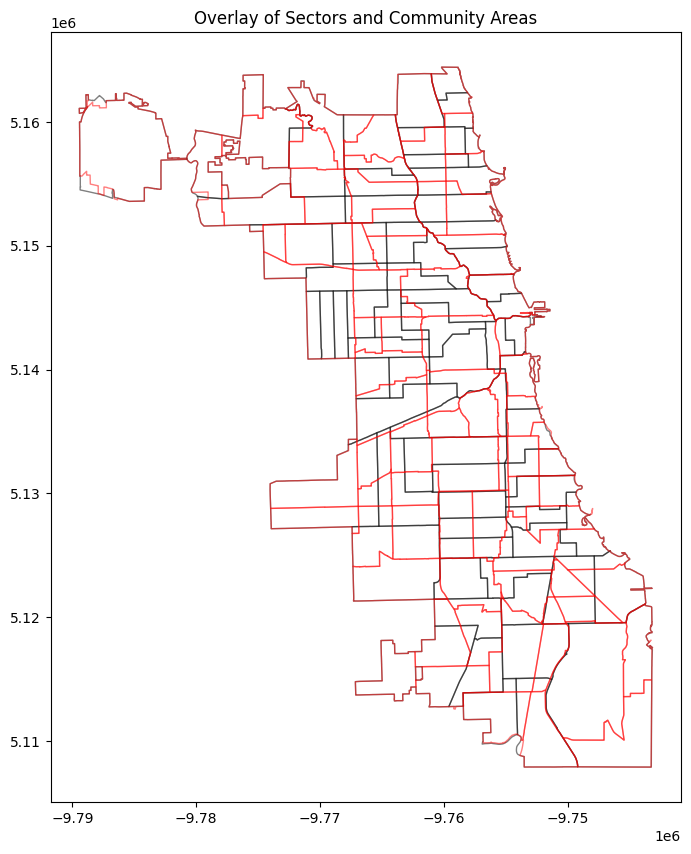

In [10]:
# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed

# Plot the 'sector' dataframe with no fill color
sector.plot(ax=ax, color='none', edgecolor='black', alpha=0.5)  # Only edge color is visible

# Plot the 'comm' dataframe with no fill color
comm.plot(ax=ax, color='none', edgecolor='red', alpha=0.5)  # Only edge color is visible

# Optional: Set additional plot parameters
ax.set_title('Overlay of Sectors and Community Areas')
ax.set_facecolor('white')  # Ensuring the background is white

# Show the plot
plt.show()


## Merging Community Area Geodata onto Census Data

In [11]:

import pandas as pd
from sqlalchemy import create_engine

# Database credentials
username = 'crimeadmin'
password = '4DAnuuSBWVQ92w!F'
host = 'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com'
database = 'crimedb_mysql'
port = '3306'  # default MySQL port

# Create the database engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

# SQL query or table name
query = "SELECT * FROM Cleaned_Census_Data"  #Name of table 

# Create a DataFrame from the SQL query
census = pd.read_sql(query, engine)

In [12]:
census

,id,Community_Area_Number,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6
...,...,...,...,...,...,...,...,...,...,...
73,74,74,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16
74,75,75,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30
75,76,76,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24
76,77,77,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19


In [13]:
merged_df = comm.merge(census, left_on='AREA_NUMBE', right_on='Community_Area_Number', how='left')


In [14]:
merged_df.head(5)

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN,id,Community_Area_Number,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,"MULTIPOLYGON (((-9752604.951 5137743.450, -975...",0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510,35,35,Douglas,1.8,29.6,18.2,14.3,30.7,23791,47
1,"MULTIPOLYGON (((-9750713.852 5133595.674, -975...",0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153,36,36,Oakland,1.3,39.7,28.7,18.4,40.4,19252,78
2,"MULTIPOLYGON (((-9754793.199 5131350.020, -975...",0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750,37,37,Fuller Park,3.2,51.2,33.9,26.6,44.9,10432,97
3,"MULTIPOLYGON (((-9752334.139 5133578.410, -975...",0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157,38,38,Grand Boulevard,3.3,29.3,24.3,15.9,39.5,23472,57
4,"MULTIPOLYGON (((-9750713.852 5133595.674, -975...",0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906,39,39,Kenwood,2.4,21.7,15.7,11.3,35.4,35911,26


In [15]:
columns_to_drop = ['PERIMETER', 'AREA', 'COMAREA_', 'COMAREA_ID', 'AREA_NUMBE', 'AREA_NUM_1', 'SHAPE_AREA', 'SHAPE_LEN','id']
merged_df = merged_df.drop(columns=columns_to_drop, axis=1)

#merged_df = merged_df.rename(columns={'the_geom': 'geometry'})

merged_df = merged_df.sort_values(by='Community_Area_Number').reset_index(drop=True)



In [16]:
merged_df.head(5)

,the_geom,COMMUNITY,Community_Area_Number,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,"MULTIPOLYGON (((-9757660.529 5160704.746, -975...",ROGERS PARK,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,"MULTIPOLYGON (((-9761010.933 5163898.616, -976...",WEST RIDGE,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,"MULTIPOLYGON (((-9756154.198 5154211.526, -975...",UPTOWN,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,"MULTIPOLYGON (((-9759870.406 5157400.522, -975...",LINCOLN SQUARE,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,"MULTIPOLYGON (((-9759754.254 5150850.097, -975...",NORTH CENTER,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


## Merging Community Area and Census Data

### Joining based on which community area is closest

In [17]:
"""

# Perform the nearest join
initial_crs = 'EPSG:4326'

# Set the CRS for the DataFrames
merged_df.crs = initial_crs

# Define the CRS you want to use for reprojection (e.g., EPSG:3857 for Web Mercator)
desired_crs = 'EPSG:3857'

# Reproject the DataFrame to the desired CRS
merged_df = merged_df.to_crs(desired_crs)
"""

joined_df = gpd.sjoin_nearest(sector, merged_df, how='left')

In [18]:
joined_df.head(5)

,SECTOR,geometry,index_right,COMMUNITY,Community_Area_Number,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,110,"POLYGON ((-9754279.929 5144340.144, -9754262.6...",32,NEAR SOUTH SIDE,33,Near South Side,1.3,13.8,4.9,7.4,21.8,59077,7
0,110,"POLYGON ((-9754279.929 5144340.144, -9754262.6...",31,LOOP,32,Loop,1.5,14.7,5.7,3.1,13.5,65526,3
0,110,"POLYGON ((-9754279.929 5144340.144, -9754262.6...",7,NEAR NORTH SIDE,8,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1
1,120,"POLYGON ((-9755448.614 5141039.517, -9755449.7...",32,NEAR SOUTH SIDE,33,Near South Side,1.3,13.8,4.9,7.4,21.8,59077,7
1,120,"POLYGON ((-9755448.614 5141039.517, -9755449.7...",31,LOOP,32,Loop,1.5,14.7,5.7,3.1,13.5,65526,3


### Joining based on which community area shares the most area with sector

In [19]:


def max_overlap_join(target_df, source_df):
    joined_df = target_df.copy()
    for idx, row in target_df.iterrows():
        # Calculate intersection areas
        intersections = source_df.intersection(row['geometry']).area
        # Find the index with the maximum intersection area
        max_idx = intersections.idxmax()
        # Join data from source_df to target_df
        for col in source_df.columns:
            joined_df.at[idx, col] = source_df.at[max_idx, col]
    return joined_df

result_df = max_overlap_join(sector, merged_df)



/var/folders/gw/kyktsykx5kddft5zdz_8y75h0000gn/T/ipykernel_13956/321833572.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'MULTIPOLYGON (((-9752643.348235618 5144426.338111069, -9752643.317992365 5144424.974800181, -9752443.474482864 5144422.22996159, -9752443.106068458 5144422.280181268, -9752441.847302465 5144422.232563888, -9752440.64020163 5144421.86119992, -9752439.570611628 5144421.191480822, -9752438.707574915 5144420.273071925, -9752438.107831698 5144419.1600481095, -9752437.502233164 5144409.023149922, -9752437.76634938 5144408.24562558, -9752438.154735064 5144407.5524593005, -9752438.45964934 5144407.008242812, -9752439.416918777 5144405.961743431, -9752440.588821242 5144405.163199941, -9752445.31924957 5144405.121363458, -9752442.946217341 5144402.341098515, -9752441.364155512 5144400.487615681, -9752439.336465938 5144317.980182609, -9752429.605323058 5144318.094544715, -9752423.852147363 5144312.87

In [20]:
#Converting Community Area to int
result_df['Community_Area_Number'] = result_df['Community_Area_Number'].astype(int)

result_df.head(5)

,SECTOR,geometry,the_geom,COMMUNITY,Community_Area_Number,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,110,"POLYGON ((-9754279.929 5144340.144, -9754262.6...",MULTIPOLYGON (((-9752643.348235618 5144426.338...,LOOP,32,Loop,1.5,14.7,5.7,3.1,13.5,65526.0,3.0
1,120,"POLYGON ((-9755448.614 5141039.517, -9755449.7...",MULTIPOLYGON (((-9755771.713460958 5143953.073...,NEAR WEST SIDE,28,Near West Side,3.8,20.6,10.7,9.6,22.2,44689.0,15.0
2,130,"POLYGON ((-9752594.784 5138127.819, -9752557.8...",MULTIPOLYGON (((-9752604.95117241 5137743.4497...,NEAR SOUTH SIDE,33,Near South Side,1.3,13.8,4.9,7.4,21.8,59077.0,7.0
3,210,"POLYGON ((-9753455.652 5133503.605, -9753454.9...",MULTIPOLYGON (((-9752604.95117241 5137743.4497...,DOUGLAS,35,Douglas,1.8,29.6,18.2,14.3,30.7,23791.0,47.0
4,220,"POLYGON ((-9754105.657 5131204.069, -9754103.2...",MULTIPOLYGON (((-9750713.851501133 5133595.673...,KENWOOD,39,Kenwood,2.4,21.7,15.7,11.3,35.4,35911.0,26.0


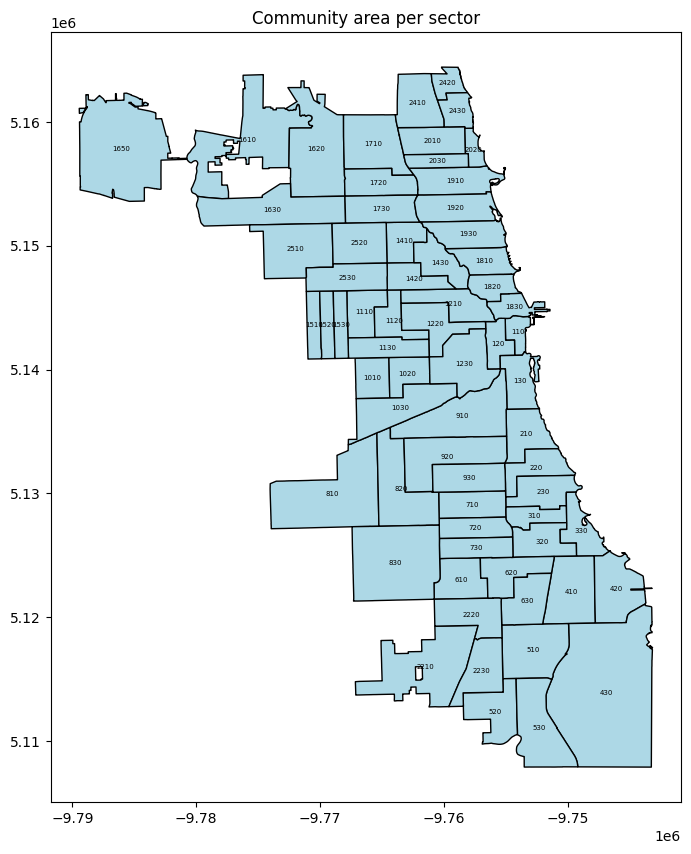

In [21]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 10))
result_df.plot(ax=ax, color='lightblue', edgecolor='black')

# Add labels
for idx, row in result_df.iterrows():
    # Extract the centroid of the polygon
    centroid = row.geometry.centroid
    # Annotate with the SECTOR value
    ax.annotate(text=str(row['SECTOR']), xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize=5, color='black')

# Customize the plot
ax.set_title('Community area per sector')
plt.show()


## Visuals to Confirm if Joining was Accurate

In [22]:
"""
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 10))
result_df.plot(ax=ax, color='lightblue', edgecolor='black')

# Add labels
for idx, row in result_df.iterrows():
    # Extract the centroid of the polygon
    centroid = row.geometry.centroid
    # Annotate with the SECTOR value
    ax.annotate(text=str(row['Community_Area_Number']), xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize=5, color='black')

# Customize the plot
ax.set_title('Community area per sector')
plt.show()
"""

"\n# Plotting the data\nfig, ax = plt.subplots(figsize=(10, 10))\nresult_df.plot(ax=ax, color='lightblue', edgecolor='black')\n\n# Add labels\nfor idx, row in result_df.iterrows():\n    # Extract the centroid of the polygon\n    centroid = row.geometry.centroid\n    # Annotate with the SECTOR value\n    ax.annotate(text=str(row['Community_Area_Number']), xy=(centroid.x, centroid.y),\n                horizontalalignment='center', verticalalignment='center', fontsize=5, color='black')\n\n# Customize the plot\nax.set_title('Community area per sector')\nplt.show()\n"

In [23]:
"""

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 10))
merged_df.plot(ax=ax, color='lightblue', edgecolor='black')

# Add labels
for idx, row in merged_df.iterrows():
    # Extract the centroid of the polygon
    centroid = row.the_geom.centroid
    # Annotate with the SECTOR value
    ax.annotate(text=str(row['Community_Area_Number']), xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize=5, color='black')

# Customize the plot
ax.set_title('Community area per sector')
plt.show()
"""

"\n\n# Plotting the data\nfig, ax = plt.subplots(figsize=(10, 10))\nmerged_df.plot(ax=ax, color='lightblue', edgecolor='black')\n\n# Add labels\nfor idx, row in merged_df.iterrows():\n    # Extract the centroid of the polygon\n    centroid = row.the_geom.centroid\n    # Annotate with the SECTOR value\n    ax.annotate(text=str(row['Community_Area_Number']), xy=(centroid.x, centroid.y),\n                horizontalalignment='center', verticalalignment='center', fontsize=5, color='black')\n\n# Customize the plot\nax.set_title('Community area per sector')\nplt.show()\n"

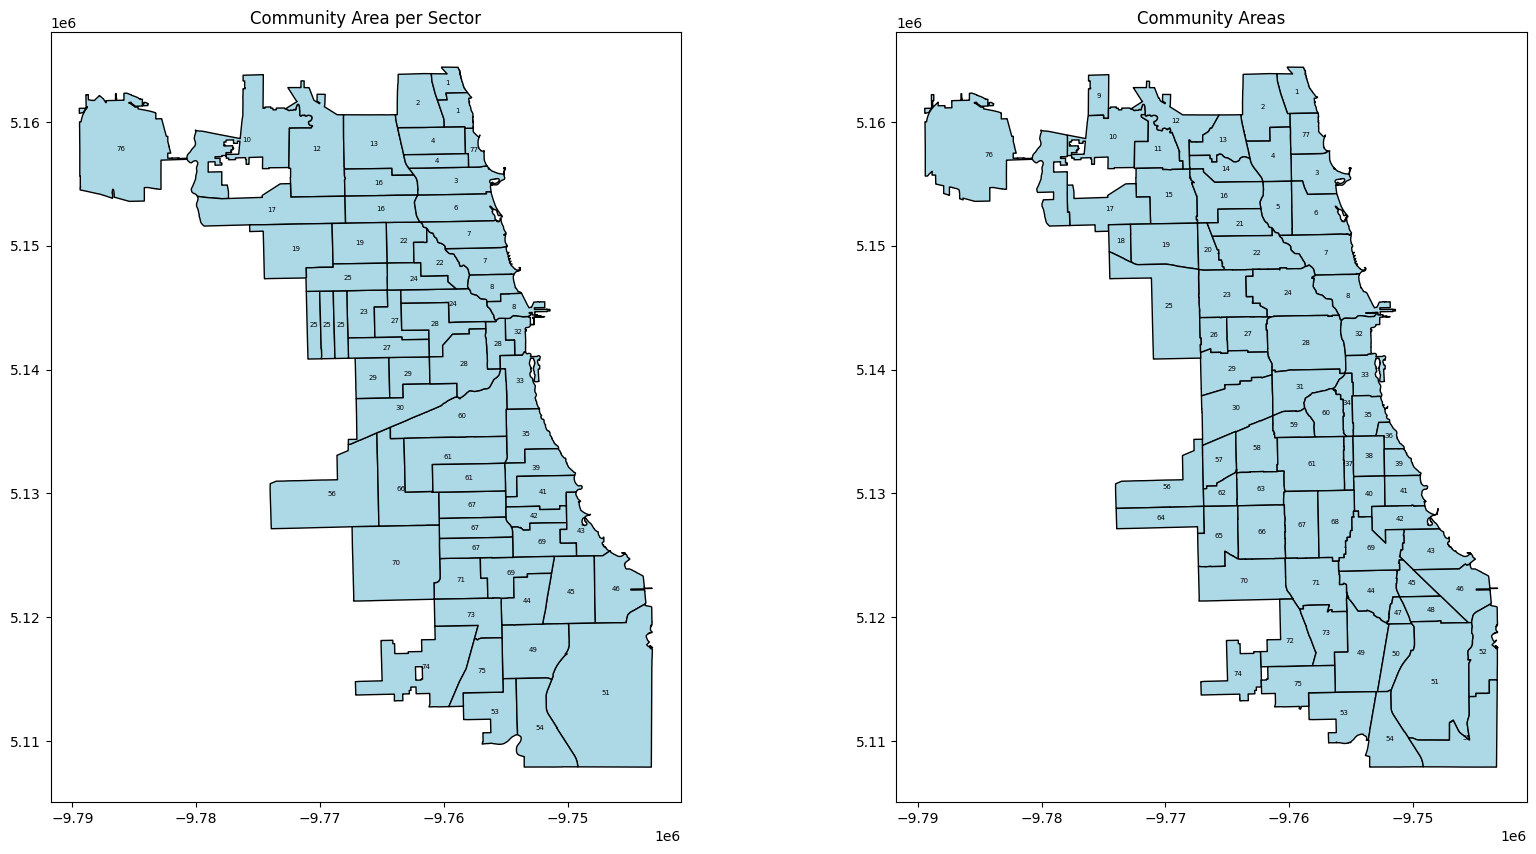

In [25]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plotting the first data (result_df)
result_df.plot(ax=ax1, color='lightblue', edgecolor='black')
# Add labels for result_df
for idx, row in result_df.iterrows():
    centroid = row.geometry.centroid
    ax1.annotate(text=str(row['Community_Area_Number']), xy=(centroid.x, centroid.y),
                 horizontalalignment='center', verticalalignment='center', fontsize=5, color='black')
# Customize the first plot
ax1.set_title('Community Area per Sector')

# Plotting the second data (merged_df)
merged_df.plot(ax=ax2, color='lightblue', edgecolor='black')
# Add labels for merged_df
for idx, row in merged_df.iterrows():
    centroid = row.the_geom.centroid
    ax2.annotate(text=str(row['Community_Area_Number']), xy=(centroid.x, centroid.y),
                 horizontalalignment='center', verticalalignment='center', fontsize=5, color='black')
# Customize the second plot
ax2.set_title('Community Areas')

# Display the figure
plt.show()


## Joining onto Regression Model and Uploading to Database

In [26]:
import pandas as pd
from sqlalchemy import create_engine

# Database credentials
username = 'crimeadmin'
password = '4DAnuuSBWVQ92w!F'
host = 'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com'
database = 'crimedb_mysql'
port = '3306'  # default MySQL port

# Create the database engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

# SQL query or table name
query = "SELECT * FROM TIME_SERIES_REGRESSION_3"  #Name of table 

# Create a DataFrame from the SQL query
df_violent = pd.read_sql(query, engine)

In [28]:
#Changing Column name for joining
result_df = result_df.rename(columns={'SECTOR': 'Sector'})

In [31]:
# Perform a left join
merged_df = df_violent.merge(result_df, on='Sector', how='left')


In [34]:
# List of columns to drop
columns_to_drop = ['COMMUNITY','COMMUNITY_AREA_NAME',
                   'geometry', 'the_geom','Community_Area_Number',
       ] 

# Dropping the columns from the DataFrame
merged_df = merged_df.drop(columns=columns_to_drop, axis=1)


In [37]:
merged_df.columns

Index(['Sector', 'Month', 'Violent Crimes', 'SAFETY', 'S_EDUCATION_LOW',
       'S_EDUCATION_MEDIUM', 'S_EDUCATION_HIGH', 'S_INCOME_LOW',
       'S_INCOME_MEDIUM', 'S_INCOME_HIGH', 'TRUST', 'T_EDUCATION_LOW',
       'T_EDUCATION_MEDIUM', 'T_EDUCATION_HIGH', 'T_INCOME_LOW',
       'T_INCOME_MEDIUM', 'T_INCOME_HIGH', 'TOTAL POPULATION',
       'Population Density (people/sqkm)', 'Violent Crimes per Capita',
       'Units', 'Units per SqKm', 'Units per Capita',
       'PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
       'PERCENT_AGED_16_UNEMPLOYED',
       'PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX'],
      dtype='object')

In [38]:
merged_df.head(5)

,Sector,Month,Violent Crimes,SAFETY,S_EDUCATION_LOW,S_EDUCATION_MEDIUM,S_EDUCATION_HIGH,S_INCOME_LOW,S_INCOME_MEDIUM,S_INCOME_HIGH,...,Units,Units per SqKm,Units per Capita,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,110,2017-11,66,68.23,NaN,NaN,NaN,NaN,NaN,NaN,...,511.0,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0
1,110,2017-12,52,65.67,NaN,NaN,NaN,NaN,NaN,NaN,...,511.0,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0
2,110,2018-01,74,72.35,NaN,NaN,NaN,NaN,NaN,NaN,...,511.0,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0
3,110,2018-02,73,75.66,NaN,NaN,NaN,NaN,NaN,NaN,...,511.0,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0
4,110,2018-03,84,73.90,62.18,78.27,74.8,65.28,78.7,73.23,...,511.0,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0


In [39]:
#Uploading new dataset

from sqlalchemy import create_engine

# Create the database engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}/{database}')

# Specify the new table name here
new_table_name = 'TIME_SERIES_REGRESSION_5'

# Upload the dataframe to the new table
merged_df.to_sql(new_table_name, con=engine, if_exists='replace', index=False)

4891